In [56]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import time

%matplotlib inline

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [58]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Check computational time differences

In [59]:
kVec = range(2,11)
tkm = np.zeros((len(kVec),1))
tmbkm = np.zeros((len(kVec),1))

for k, ii in zip(kVec, range(0,len(kVec))): 
    k_means = KMeans(n_clusters=k, random_state=42)
    t1s = time.time()
    k_means.fit(X_pca)
    t1e = time.time()
    tkm[ii] = t1e-t1s 
    
    mini_k = MiniBatchKMeans(init='random', n_clusters=k, batch_size=200)
    t2s = time.time()
    mini_k.fit(X_pca)
    t2e = time.time()
    tmbkm[ii] = t2e-t2s

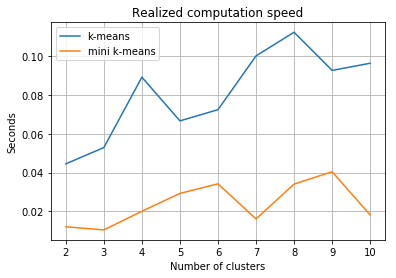

In [60]:
plt.plot(kVec, tkm, label='k-means')
plt.plot(kVec, tmbkm, label='mini k-means')
plt.title('Realized computation speed')
plt.xlabel('Number of clusters')
plt.ylabel('Seconds')
plt.legend(loc='best')
plt.grid(b='on')
plt.show()